<a href="https://colab.research.google.com/github/Steven-Macas/SAA/blob/Pandas/ejerciciosPandas_saa_stevenMacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicios de desarrollo. Dataframes y preproceso**

---



***1. Crea un dataframe con 1000 registros para tres datos con valores aleatorios generados***

• x → entre 20 y 50

• y → entre 50 y 150

• z → entre 10000 y 40000

In [ ]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import random
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Creamos 3 arrays para las columnas con el rango de cada columna que nos indica

In [ ]:
#Creamos los 1000 registros con los rangos que nos piden para cada atributo
x = []
y = []
z = []
for a in range(1000):
  x.append(random.randint(20, 50))
for b in range(1000):
  y.append(random.randint(50, 150))
for c in range(1000):
  z.append(random.randint(10000, 40000))

Creamos una matriz con los datos de los tres arrays de antes y lo convertimos a DataFrame

In [ ]:
data = {
    'Edad':x,
    'Peso':y,
    'Salario':z
}
data = pd.DataFrame(data)

In [ ]:
#Como los valores de cada columna se ve bien porque hay variedad 
#y las medias sale algo normal para el rango que tienen
#lo guardamos para volver a trabajar con ella más adelante
#data.to_csv('dataFrame.csv')
data = pd.read_csv('dataFrame.csv')

In [ ]:
data.drop(['Unnamed: 0'],axis=1)

,Edad,Peso,Salario
0,35,144,32463
1,39,85,33905
2,31,61,29817
3,35,103,28138
4,50,79,38301
...,...,...,...
997,37,111,16076
998,44,90,29668
999,23,95,36629
1001,90,80,25000


In [ ]:
#Podemos visualizarlo ahora
data.head()

,Unnamed: 0,Edad,Peso,Salario
0,0,35,144,32463
1,1,39,85,33905
2,2,31,61,29817
3,3,35,103,28138
4,4,50,79,38301


***2. Muestra los datos estadísticos de cada variable (media, desviación típica, máx, mín, etc.)***

In [ ]:
#Media de cada columna
mean_edad = data['Edad'].mean()
mean_peso = data['Peso'].mean()
mean_salario = data['Salario'].mean()
print('Media de Edad: ', mean_edad)
print('Media de Peso: ', mean_peso)
print('Media de Salario: ', mean_salario)

Media de Edad:  35.189
Media de Peso:  98.298
Media de Salario:  24967.826


In [ ]:
#Moda de cada columna
moda_peso = data['Peso'].mode()[0]
moda_edad = data['Edad'].mode()[0]
moda_salario = data['Salario'].mode()[0]
print('Moda de Edad:', moda_edad)
print('Moda de Peso:', moda_peso)
print('Moda de Salario:', moda_salario)

Moda de Edad: 47
Moda de Peso: 73
Moda de Salario: 11582


In [ ]:
#Mediana de cada columna
median_edad = data['Edad'].median()
median_peso = data['Peso'].median()
median_salario = data['Salario'].median()
print('Mediana de Edad: ', median_edad)
print('Mediana de Peso: ', median_peso)
print('Mediana de Salario: ', median_salario)

Mediana de Edad:  36.0
Mediana de Peso:  98.0
Mediana de Salario:  24848.5


In [ ]:
#Valor máximo y mínimo
max_edad = data['Edad'].max()
max_peso = data['Peso'].max()
max_salario = data['Salario'].max()
min_edad = data['Edad'].min()
min_peso = data['Peso'].min()
min_salario = data['Salario'].min()
print('Máximo de Edad: ', max_edad, '.\n Mínimo de Edad: ', min_edad)
print('Máximo de Peso: ', max_peso, '.\n Mínimo de Peso: ', min_peso)
print('Máximo de Salario: ', max_salario, '.\n Mínimo de Salario: ', min_salario)

Máximo de Edad:  50 .
 Mínimo de Edad:  20
Máximo de Peso:  150 .
 Mínimo de Peso:  50
Máximo de Salario:  40000 .
 Mínimo de Salario:  10013


In [ ]:
#Desviación de cada columna
desv_edad = data['Edad'].std()
desv_peso = data['Peso'].std()
desv_salario = data['Salario'].std()
print('Desviación de Edad: ', desv_edad)
print('Desviación de Peso: ', desv_peso)
print('Desviación de Salario: ', desv_salario)

Desviación de Edad:  9.037087359760774
Desviación de Peso:  29.31843731795347
Desviación de Salario:  8659.074155760474


**3. Usando la distribución normal calcula las siguientes probabilidades**
1.   calcula (usando la distribución normal) la probabilidad que el valor y esté entre 55 y 70
2.   calcula (usando la distribución normal) la probabilidad que el valor z esté entre 20000 y
30000



In [ ]:
#Estandarizacion
a = (55-median_peso)/desv_peso
b = (70-median_peso)/desv_peso
prob_peso = st.norm.cdf(b) - st.norm.cdf(a)
a2 = (20000-median_salario)/desv_salario
b2 = (30000-median_salario)/desv_salario
prob_salario = st.norm.cdf(b2) - st.norm.cdf(a2)
print('Probabilidad de que el Peso esté entre 55-70 es ', prob_peso)
print('Probabilidad de que el Salario esté entre 20000-30000 es ', prob_salario)

Probabilidad de que el Peso esté entre 55-70 es  0.09854603580465887
Probabilidad de que el Salario esté entre 20000-30000 es  0.436290585935557


**4. Realiza dos funciones que reciban un dataframe y un nombre de columna y devuelva una tupla con los valores (XL, XN) correspondiente al intervalo al cual si no pertenece un valor puede ser considerado como outlier.**

• Realiza el método 1 (el que se basa en la distribución normal).

    ◦ Esta función además deberá recibir el porcentaje para que un elemento se quede en la banda

• Realiza la función usando el método basado en cuantilies

    ◦ Esta función además deberá recibir otro parámetro (k) que indica si queremos detectar outliers débiles(1.5) o no (k=3)

In [ ]:
def bandas(data,columna,k):
  #Calculamos los cuartiles, 1 y 3
  Q1  = np.quantile(data[columna], 0.25)
  Q3  = np.quantile(data[columna], 0.75)
  IQR = Q3 - Q1

  #Calculamos los extremos
  xL = Q1 - k * IQR
  xU = Q3 + k * IQR
  result = [xL,xU]
  return result

result = bandas(data,'Edad',1.5)
result

[3.0, 67.0]

**5. Introduce deliberadamente dos valores fuera de los rangos en alguno de los atributos (x, y, z) y, usando el método jackknife detecte las observaciones influyentes para la media. Haz lo mismo para la mediana. Comenta los resultados obtenidos.**

añadimos dos valores fueras del rango

In [ ]:
data.loc[1000] = [1001,1290,80,25000]

In [ ]:
data.loc[1001] = [1002,1290,85,26000]

In [ ]:
data.tail()

,Unnamed: 0,Edad,Peso,Salario
997,997,37,111,16076
998,998,44,90,29668
999,999,23,95,36629
1000,1001,1290,80,25000
1001,1002,1290,85,26000


calculamos la media y mediana con los dos valores que hemos introducido.

In [ ]:
media = np.mean(data['Edad'])
mediana = np.median(data['Edad'])
print('Media: ', media, '. Mediana: ',mediana)

Media:  37.6936127744511 . Mediana:  36.0


Ahora ejecutamos la media quitando un dato cada vez

In [ ]:
edad_arr= data['Edad'].to_numpy()

In [ ]:
edad_arr

array([  35,   39,   31, ...,   23, 1290, 1290])

In [ ]:
medias = np.zeros(len(edad_arr))
for i in range(len(edad_arr)):
  datos_sin_i = np.delete(edad_arr,i)
  medias[i]=np.mean(datos_sin_i)

In [ ]:
#Calculamos los cuartiles, 1 y 3
Q1  = np.quantile(medias, 0.25)
Q3  = np.quantile(medias, 0.75)
IQR = Q3 - Q1
k=1
#Calculamos los extremos
xL = Q1 - k * IQR
xU = Q3 + k * IQR


for i in range(len(edad_arr)):
  if medias[i] < xL or medias[i] > xU:
    print(f"La media[{i}] = {medias[i]} es influyente")


La media[1000] = 36.442557442557444 es influyente
La media[1001] = 36.442557442557444 es influyente


***6. Utiliza MinMaxScaler para realizar un escalado del dataframe creado en el ejercicio 1. Muestra los resultados y comenta que ha sucedido.***

In [ ]:
scaler = MinMaxScaler()
print(scaler.fit(data))
print(scaler.data_max_)
print(scaler.transform(data))

MinMaxScaler()
[ 1002.  1290.   150. 40000.]
[[0.00000000e+00 1.18110236e-02 9.40000000e-01 7.48657752e-01]
 [9.98003992e-04 1.49606299e-02 3.50000000e-01 7.96745256e-01]
 [1.99600798e-03 8.66141732e-03 1.10000000e-01 6.60419515e-01]
 ...
 [9.97005988e-01 2.36220472e-03 4.50000000e-01 8.87584620e-01]
 [9.99001996e-01 1.00000000e+00 3.00000000e-01 4.99783239e-01]
 [1.00000000e+00 1.00000000e+00 3.50000000e-01 5.33131023e-01]]




---



# Ejemplo de como crear un grafico en pandas

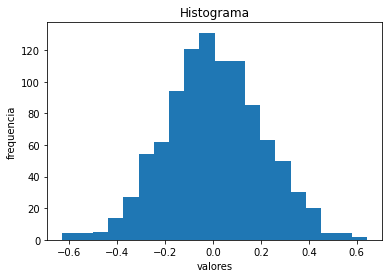

In [ ]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()